# Context

In this project, we are going to implement a handwritten digit recognition app using the MNIST dataset. We will be using a special type of deep neural network that is Convolutional Neural Networks. In the end, we are going to build a GUI (Graphic User Interface) in which you can draw the digit and recognize it straight away.

# The MNIST dataset

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 60,000 training images of handwritten digits from 0-9 and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits are 28×28 grayscale images. 

# Import libraries and load the dataset

First, we are going to import all the modules that we are going to need for training our model. The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The **mnist.load_data()** method returns us the training data, its labels and also the testing data and its labels.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


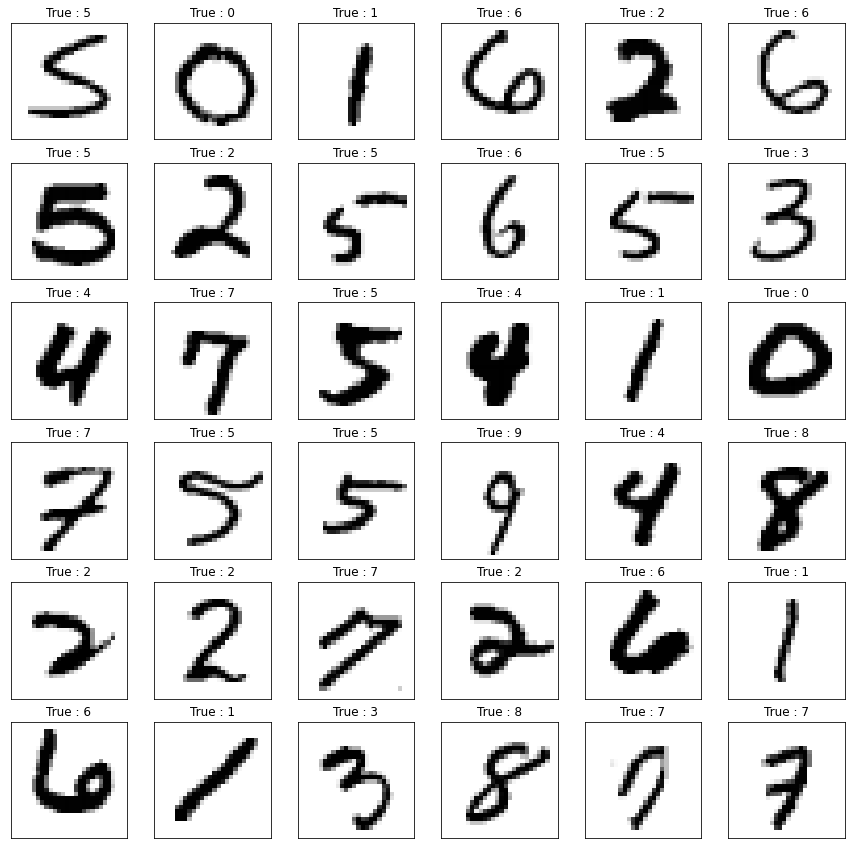

In [2]:
# Let's have a look on some of the images
random_inds = np.random.choice(x_train.shape[0], 36)
plt.figure(figsize=(15, 15))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(x_train[image_ind], cmap=plt.cm.binary)
    plt.title(f"True : {y_train[image_ind]}")

In [3]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
    return

matprint(x_train[0])
y_train[0]

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


5

C:\Users\silve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Classes')

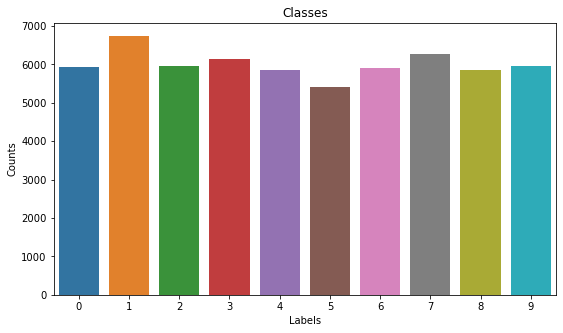

In [4]:
plt.figure(figsize=(9, 5))
sns.countplot(y_train)
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Classes")

From above figure, the dataset looks balanced

# Preprocess the data

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1). We also normalize the image data dividing by 255.

In [5]:
x_train = (np.expand_dims(x_train, axis=-1)/255.).astype(np.float32)
x_test = (np.expand_dims(x_test, axis=-1)/255.).astype(np.float32)

y_train = (y_train).astype(np.int64)
y_test = (y_test).astype(np.int64)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# Create the model

Now we will create our CNN model. A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to desactivate some of the neurons and while training, it reduces overfitting of the model. We will then compile the model with the Adam optimizer.

In [6]:
input_shape = (28, 28, 1)
num_classes = 10

model = tf.keras.Sequential([
    # First layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    
    # Second Layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.25),
    
    # Third Layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.25),
    
    # Fourth Layer
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.25),
    
    # Fith layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    # sixth layer
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    # Output layer
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['Accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                        

# Train the model

We will train the model calling **model.fit()** function. After training, we save the weights and model definition in the ‘mnist.h5’ file.

## Data augmentation

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(    
    rotation_range= 20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.2
)

In [8]:
datagen.fit(x_train)

## Training process

In [9]:
batch_size = 64
epochs = 10

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size, subset='training'),
                    validation_data=datagen.flow(x_train, y_train, batch_size=batch_size//2, subset='validation'),
                    epochs=epochs)
print("The model has successfully trained\nSaving the model ...")

model.save('mnist.h5')
print("Model saved as 'mnist.h5'")

Epoch 1/10
750/750 [==============================] - 124s 164ms/step - loss: 0.9723 - Accuracy: 0.6949 - val_loss: 0.3920 - val_Accuracy: 0.8783
Epoch 2/10
750/750 [==============================] - 132s 176ms/step - loss: 0.3320 - Accuracy: 0.8976 - val_loss: 0.2711 - val_Accuracy: 0.9222
Epoch 3/10
750/750 [==============================] - 132s 176ms/step - loss: 0.2296 - Accuracy: 0.9316 - val_loss: 0.1336 - val_Accuracy: 0.9590296 - Accuracy: 0.93
Epoch 4/10
750/750 [==============================] - 129s 172ms/step - loss: 0.1873 - Accuracy: 0.9443 - val_loss: 0.1101 - val_Accuracy: 0.9668
Epoch 5/10
750/750 [==============================] - 130s 173ms/step - loss: 0.1620 - Accuracy: 0.9519 - val_loss: 0.1097 - val_Accuracy: 0.9672
Epoch 6/10
750/750 [==============================] - 130s 173ms/step - loss: 0.1466 - Accuracy: 0.9561 - val_loss: 0.0772 - val_Accuracy: 0.9768
Epoch 7/10
750/750 [==============================] - 146s 195ms/step - loss: 0.1309 - Accuracy: 0.9619 

As we can see from above verbose, the model achieved about 96.9% accuracy on trainig and 98.4% on validation data. This is very good performance. May be it can be improved by training much longer.

In [11]:
# Let's check the saved model
loaded_model = tf.keras.models.load_model("mnist.h5")

# This will generate error if predictions are not the same
np.testing.assert_allclose(
    model.predict(x_test), loaded_model.predict(x_test)
)

## Model evaluation

In [12]:
_, tes_acc = loaded_model.evaluate(x_test, y_test)
print("Test acc : %.1f%s"% (tes_acc*100, "%"))

313/313 [==============================] - 6s 19ms/step - loss: 0.0245 - Accuracy: 0.9923
Test acc : 99.2%


## Make predictions

In [13]:
preds = loaded_model.predict(x_test)
preds = np.argmax(preds, axis=1)

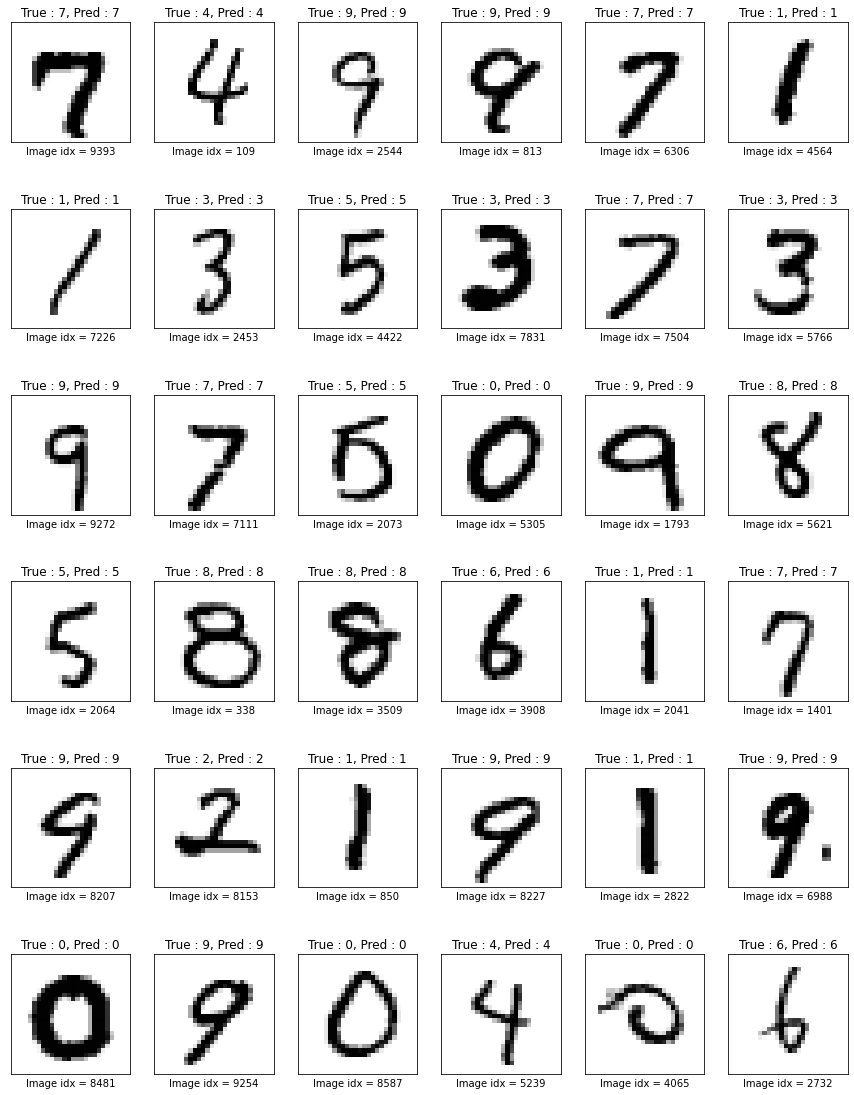

In [14]:
random_inds = np.random.choice(x_test.shape[0], 36)

plt.figure(figsize=(15, 20))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(x_test[image_ind], cmap=plt.cm.binary)
    plt.title(f"True : {y_test[image_ind]}, Pred : {preds[image_ind]}")
    plt.xlabel(f"Image idx = {image_ind}")

# Retrain the model using all available data
As we are planning to design a GUI for real testing, we can retrain our model using all available data (training + test)

In [16]:
all_images = np.concatenate((x_train, x_test))
all_labels = np.concatenate((y_train, y_test))

print(all_images.shape)
print(all_labels.shape)

(70000, 28, 28, 1)
(70000,)


## Data augmentation

In [17]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(    
    rotation_range= 20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.2
)

datagen.fit(all_images)

## Model training

In [18]:
batch_size = 64
epochs = 10

history = model.fit(datagen.flow(all_images, all_labels, batch_size=batch_size, subset='training'),
                    validation_data=datagen.flow(all_images, all_labels, batch_size=batch_size//2, subset='validation'),
                    epochs=epochs)
print("The model has successfully trained\nSaving the model ...")

model.save('extended_mnist.h5')
print("Model saved as 'extended_mnist.h5'")

Epoch 1/10
875/875 [==============================] - 159s 182ms/step - loss: 0.0986 - Accuracy: 0.9714 - val_loss: 0.0598 - val_Accuracy: 0.9827
Epoch 2/10
875/875 [==============================] - 142s 162ms/step - loss: 0.0925 - Accuracy: 0.9728 - val_loss: 0.0482 - val_Accuracy: 0.9861
Epoch 3/10
875/875 [==============================] - 142s 163ms/step - loss: 0.0900 - Accuracy: 0.9737 - val_loss: 0.0499 - val_Accuracy: 0.9854
Epoch 4/10
875/875 [==============================] - 141s 161ms/step - loss: 0.0866 - Accuracy: 0.9752 - val_loss: 0.0478 - val_Accuracy: 0.9856
Epoch 5/10
875/875 [==============================] - 140s 160ms/step - loss: 0.0799 - Accuracy: 0.9761 - val_loss: 0.0534 - val_Accuracy: 0.9850
Epoch 6/10
875/875 [==============================] - 147s 168ms/step - loss: 0.0771 - Accuracy: 0.9773 - val_loss: 0.0496 - val_Accuracy: 0.9859
Epoch 7/10
875/875 [==============================] - 152s 174ms/step - loss: 0.0787 - Accuracy: 0.9777 - val_loss: 0.0421 -

In [19]:
# Let's check the saved model
loaded_extended_model = tf.keras.models.load_model("extended_mnist.h5")

# This will generate error if predictions are not the same
np.testing.assert_allclose(
    model.predict(all_images), loaded_extended_model.predict(all_images)
)

# Hyperparameter tuning using KerasTuner

Hyperparameters are the different factors that influence the machine learning model's pace of learning. A model's performance is controlled via hyperparameters. Keras Tuner can help you find the ideal hyperparameter values for your models. The diagram depicts how a Keras tuner works.
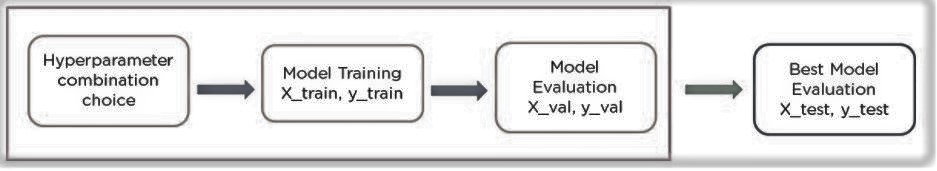

To perform hypertuning with Keras Tuner, you will need to:

* Define the model
* Select which hyperparameters to tune
* Define its search space
* Define the search strategy

`Note :` Without GPU, the tuning step takes very long time to process. So I recommend to skip to the `GUI section`.

In [39]:
# Install Keras Tuner
!pip install -q -U keras-tuner

In [41]:
# Import required packages
import tensorflow as tf
import kerastuner as kt

## Define the model

In [43]:
def model_builder(hp):
    '''
    Builds the model and sets up the hyperparameters to tune.
    
    Args:
        hp - Keras tuner object
        
    Returns:
        model with hyperparameters to tune
    '''
    
    # Initialisze the sequential API and start stacking layers
    model = tf.keras.Sequential([
        # First layer
        tf.keras.layers.Conv2D(
            # Adding filters
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            
            # Adding kernel_size
            kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
                        
            activation='relu',
            input_shape = (28, 28, 1)),
        
        # Second layer
        tf.keras.layers.Conv2D(
            # Adding filters
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
            
            # Adding kernel_size
            kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
            
            activation='relu'),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
            activation='relu'),
        
        tf.keras.layers.Dense(units=10, activation='softmax')
    ])
    
    # Compile model
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['Accuracy'])
    
    return model

## Instantiate the Tuner and perform hypertuning

Keras Tuner has [four tuners](https://keras-team.github.io/keras-tuner/documentation/tuners/) available with built-in strategies - `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`. 

In this project, I will use the Hyperband tuner. Hyperband is an algorithm specifically developed for hyperparameter optimization. It uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model.

You can refer to the [documentation](https://keras.io/api/keras_tuner/tuners/hyperband/) for arguments you can pass in.

In [55]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_Accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True,
                     directory='kt_dir',
                     project_name='kt_hyperband')

In [56]:
# Display hypertuning settings
tuner.search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [57]:
# Let's pass in a callback to stop training early when a metric is not improving
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

The arguments for the search method are the same as those used for `tf.keras.model.fit` in addition to the callback above.

In [ ]:
# Now we are ready to perform hypertuning

batch_size = 64
epochs = 10

tuner.search(datagen.flow(x_train, y_train, batch_size=batch_size, subset='training'),
             validation_data=datagen.flow(x_train, y_train, batch_size=batch_size//2, subset='validation'),
             epochs=epochs,
             callbacks=[stop_early])

Trial 2 Complete [00h 12m 09s]
val_Accuracy: 0.9823333621025085

Best val_Accuracy So Far: 0.984749972820282
Total elapsed time: 00h 16m 48s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |80                |conv_1_filter
3                 |3                 |conv_1_kernel
32                |32                |conv_2_filter
3                 |3                 |conv_2_kernel
128               |112               |dense_1_units
0.01              |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
1235/1500 [=======================>......] - ETA: 28s - loss: 0.2964 - Accuracy: 0.9097- ETA: 29s - loss: 0.2967 - Accuracy: 0.

In [ ]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]

## Build and train the model

Now that you have the best set of hyperparameters, you can rebuild the hypermodel with these values and retrain it.

In [ ]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hps)
h_model.summary()

In [ ]:
# Train the hypertuned model
h_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size, subset='training'),
            validation_data=datagen.flow(x_train, y_train, batch_size=batch_size//2, subset='validation'),
            epochs=epochs)
print("The model has successfully trained\nSaving the model ...")

h_model.save('h_mnist.h5')
print("Model saved as 'h_mnist.h5'")

In [ ]:
# Let's check the saved model
loaded_h_model = tf.keras.models.load_model("h_mnist.h5")

np.testing.assert_allclose(
    h_model.predict(x_test), loaded_h_model.predict(x_test)
)

# Create GUI to predict digits

For the GUI, we have created a new file in which we build an interactive window to draw digits on canvas and with a button, we can recognize the digit. The Tkinter library comes in the Python standard library. We have created a function predict_digit() that takes the image as input and then uses the trained model to predict the digit.

Then we create the App class which is responsible for building the GUI for our app. We create a canvas where we can draw by capturing the mouse event and with a button, we trigger the predict_digit() function and display the results.

Here’s the full code for our gui_digit_recognizer.py file:

In [21]:
import tensorflow as tf
from tkinter import *
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

#loaded_model = tf.keras.models.load_model('mnist.h5')
loaded_model = tf.keras.models.load_model('extended_mnist.h5')
#loaded_model = tf.keras.models.load_model('h_mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = loaded_model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        
        self.posx = self.posy = 0
        self.sizex = 200
        self.sizey = 200
        self.b1 = "up"
        self.xold = None
        self.yold = None 
        
        # Creating elements
        self.canvas=tk.Canvas(self, width=self.sizex, height=self.sizey, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw...", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self,text="classify!",width=10,bg='white',command=self.classify_handwriting)
        self.clear_btn =tk.Button(self,text="Clear!",width=10,bg='white',command=self.clear_all)
        
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.clear_btn.grid(row=1, column=0, pady=2)
        
        # Binding functions       
        self.canvas.bind("<Motion>", self.motion)
        self.canvas.bind("<ButtonPress-1>", self.b1down)
        self.canvas.bind("<ButtonRelease-1>", self.b1up)
        
        # Getting drawn image (in memory)
        self.image=Image.new("RGB",(self.sizex,self.sizey))
        self.draw=ImageDraw.Draw(self.image)


    def classify_handwriting(self):
        digit, acc = predict_digit(self.image)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        
    def save(self):
        filename = "temp.jpg"
        self.image.save(filename)

    def clear_all(self):
        self.canvas.delete("all")
        self.image=Image.new("RGB",(self.sizex,self.sizey))
        self.draw=ImageDraw.Draw(self.image)
        self.label.config(text="")

    def b1down(self,event):
        self.b1 = "down"

    def b1up(self,event):
        self.b1 = "up"
        self.xold = None
        self.yold = None

    def motion(self,event):
        if self.b1 == "down":
            if self.xold is not None and self.yold is not None:
                event.widget.create_line(self.xold,self.yold,event.x,event.y,smooth='true',width=20,fill='black')
                self.draw.line(((self.xold,self.yold),(event.x,event.y)),(255,255,255),width=20)

        self.xold = event.x
        self.yold = event.y

if __name__ == "__main__":
    app = App()
    app.mainloop()
